### Stock Analysis

In [ ]:
# Requirements 
!pip install yfinance

zsh:1: /Users/eunahjung/Documents/PythonProject/.venv/bin/pip: bad interpreter: /Users/eunahjung/Documents/PythonProject/stock_analysis/.venv/bin/python: no such file or directory
zsh:1: /Users/eunahjung/Documents/PythonProject/.venv/bin/pip: bad interpreter: /Users/eunahjung/Documents/PythonProject/stock_analysis/.venv/bin/python: no such file or directory


In [31]:
!python -m pip install statsmodels 

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 218.4 kB/s  0:00:40m0:00:010:02
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 627.6 kB/s  0:01:02m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [statsmodels] [statsmodels]


In [38]:
import yfinance as yf
from datetime import date

ticker = 'ADYEN.AS'

start_date = '2023-08-01'
end_date = date.today()

data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
close = yf.download(ticker, start=start_date, end=end_date, interval="1d")["Close"]

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_57077/2103475047.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed
/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_57077/2103475047.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close = yf.download(ticker, start=start_date, end=end_date, interval="1d")["Close"]
[*********************100%***********************]  1 of 1 completed


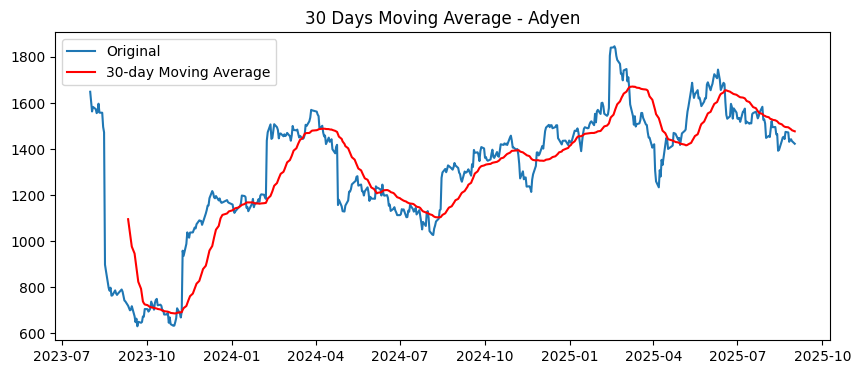

In [14]:
import matplotlib.pyplot as plt

# Moving Average (30 day window)
close_ma30 = close.rolling(window=30).mean()

plt.figure(figsize=(10,4))
plt.title("30 Days Moving Average - Adyen")
plt.plot(close, label="Original")
plt.plot(close_ma30, label="30-day Moving Average", color="red")
plt.legend(); plt.show()

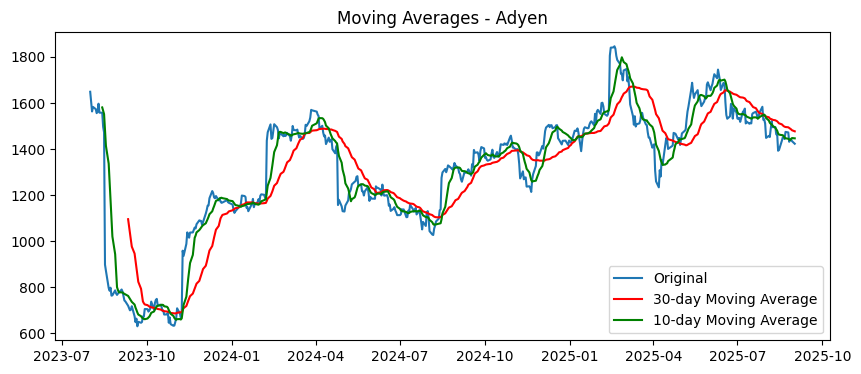

In [16]:
# 2. Closing Price data
close = data['Close']

# 3. Moving Average Calculations
close_ma30 = close.rolling(window=30).mean()
close_ma10 = close.rolling(window=10).mean()

# 4. Visualization
plt.figure(figsize=(10,4))
plt.title("Moving Averages - Adyen")
plt.plot(close, label="Original")
plt.plot(close_ma30, label="30-day Moving Average", color="red")
plt.plot(close_ma10, label="10-day Moving Average", color="green")
plt.legend()
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 533 entries, 2023-08-01 to 2025-09-01
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, ADYEN.AS)   533 non-null    float64
 1   (High, ADYEN.AS)    533 non-null    float64
 2   (Low, ADYEN.AS)     533 non-null    float64
 3   (Open, ADYEN.AS)    533 non-null    float64
 4   (Volume, ADYEN.AS)  533 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 25.0 KB


/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_57077/1811032282.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = close.resample("M").mean()


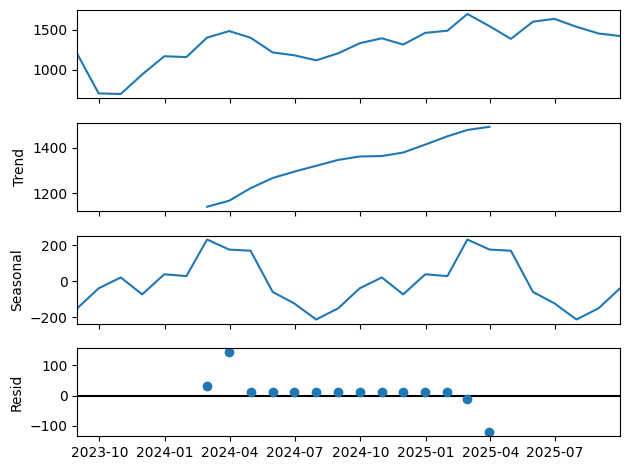

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Monthly Average
monthly = close.resample("M").mean()  
result = seasonal_decompose(monthly, model="additive", period=12)
result.plot(); plt.show()


In [51]:
import pandas as pd
tmp_series = data['Close']

series = tmp_series.reset_index(drop=True)
series

Ticker,ADYEN.AS
0,1648.599976
1,1608.000000
2,1563.199951
3,1582.800049
4,1573.400024
...,...
529,1440.000000
530,1442.599976
531,1434.400024
532,1423.000000


In [52]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# ARIMA(1,1,1)
model1 = ARIMA(series, order=(1,1,1)).fit()
print("ARIMA(1,1,1) Prediction:", model1.forecast(steps=2))

# ARIMA(2,1,0)
model2 = ARIMA(series, order=(2,1,0)).fit()
print("ARIMA(2,1,0) Prediction:", model2.forecast(steps=2))

# ARIMA(0,1,2)
model3 = ARIMA(series, order=(0,1,2)).fit()
print("ARIMA(0,1,2) Prediction:", model3.forecast(steps=2))


ARIMA(1,1,1) Prediction: 534    1371.921778
535    1368.860415
Name: predicted_mean, dtype: float64
ARIMA(2,1,0) Prediction: 534    1372.584670
535    1366.958406
Name: predicted_mean, dtype: float64
ARIMA(0,1,2) Prediction: 534    1372.697594
535    1367.702533
Name: predicted_mean, dtype: float64
